In [1]:
from dotenv import load_dotenv
load_dotenv()


import os
import pandas as pd

from src.shared.libs.s3 import S3Bucket


S3 = S3Bucket(
    bucket_name="risk",
    endpoint_url=os.getenv("S3_ENDPOINT_URL"),
    region_name=os.getenv("AWS_REGION_NAME"),
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
)

In [2]:
# DATA_PATH = "/Users/alexiscruveiller/Desktop/git/hackathon-meteo-france/data"

# for file in S3.list_files(prefix="hackathon_fwi"):
#     S3.download_file(
#         file
#         , f"{DATA_PATH}/raw/{file.split('/')[-1]}"
#     )

In [3]:
import xarray as xr
import pandas as pd
from tqdm import tqdm

list_files = []

DATA_PATH = "/Users/alexiscruveiller/Desktop/git/hackathon-meteo-france/data/raw"

def get_file(folder: str, date: str) -> xr.Dataset:
    file_path = f"{DATA_PATH}/{folder}/ECMWF_FWI_FWI_{date.strftime('%Y%m%d')}_1200_mean_v4.0_con.nc"
    return xr.open_dataset(file_path, decode_coords="all")
    
for date in tqdm(pd.date_range(start="2020-01-01", end="2020-12-31")):
    list_files.append(get_file("dataset-cems-fire-historical-3b952d76-2704-497b-aa15-8391d499c1cf", date))

    
for date in tqdm(pd.date_range(start="2021-01-01", end="2021-12-31")):
    list_files.append(get_file("dataset-cems-fire-historical-21e1b01f-abe5-4a41-9802-242e8f8b7454", date))

for date in tqdm(pd.date_range(start="2022-01-01", end="2022-12-31")):
    try:
        list_files.append(get_file("dataset-cems-fire-historical-67002548-fdfb-4fed-ab7d-ade9ef7110ec", date))
    except FileNotFoundError:
        print(f"Date {date.strftime('%Y%m%d')} not found")

 30%|██▉       | 108/365 [00:00<00:00, 347.07it/s]

Date 20220301 not found


100%|██████████| 365/365 [00:00<00:00, 598.13it/s]

Date 20220801 not found
Date 20220802 not found
Date 20220803 not found
Date 20220804 not found
Date 20220805 not found
Date 20220806 not found
Date 20220807 not found
Date 20220808 not found
Date 20220809 not found
Date 20220810 not found
Date 20220811 not found
Date 20220812 not found
Date 20220813 not found
Date 20220814 not found
Date 20220815 not found
Date 20220816 not found
Date 20220817 not found
Date 20220818 not found
Date 20220819 not found
Date 20220820 not found
Date 20220821 not found
Date 20220822 not found
Date 20220823 not found
Date 20220824 not found
Date 20220825 not found
Date 20220826 not found
Date 20220827 not found
Date 20220828 not found
Date 20220829 not found
Date 20220830 not found
Date 20220831 not found
Date 20220901 not found
Date 20220902 not found
Date 20220903 not found
Date 20220904 not found
Date 20220905 not found
Date 20220906 not found
Date 20220907 not found
Date 20220908 not found
Date 20220909 not found
Date 20220910 not found
Date 20220911 no

In [4]:
fwi_scores = xr.concat(list_files, dim="time")

In [5]:
fwi_scores

<xarray.Dataset> Size: 979MB
Dimensions:    (time: 942, longitude: 720, latitude: 361)
Coordinates:
  * time       (time) datetime64[ns] 8kB 2020-01-01T12:00:00 ... 2022-07-31T1...
  * longitude  (longitude) float32 3kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude   (latitude) float32 1kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
Data variables:
    fwi        (time, latitude, longitude) float32 979MB nan nan nan ... nan nan
Attributes:
    CDI:                       Climate Data Interface version 1.9.8 (https://...
    Conventions:               CF-1.6
    history:                   Sun Aug 01 16:40:28 2021: cdo -f nc4 -chname,f...
    institution:               European Centre for Medium-Range Weather Forec...
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 1.9.8 (https://...

In [6]:
# res = fwi_scores.isel(time=400).query({"longitude": "fwi > 0", "latitude": "fwi > 0"})

# fwi_scores.isel(time=400).plot.scatter(x='longitude', y='latitude')


In [11]:
fwi_scores.rio.write_crs(4326)

<xarray.Dataset> Size: 979MB
Dimensions:      (time: 942, longitude: 720, latitude: 361)
Coordinates:
  * time         (time) datetime64[ns] 8kB 2020-01-01T12:00:00 ... 2022-07-31...
  * longitude    (longitude) float32 3kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude     (latitude) float32 1kB 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
    spatial_ref  int64 8B 0
Data variables:
    fwi          (time, latitude, longitude) float32 979MB nan nan ... nan nan
Attributes:
    CDI:                       Climate Data Interface version 1.9.8 (https://...
    Conventions:               CF-1.6
    history:                   Sun Aug 01 16:40:28 2021: cdo -f nc4 -chname,f...
    institution:               European Centre for Medium-Range Weather Forec...
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 1.9.8 (https://...

In [17]:
fwi_scores.fwi

<xarray.DataArray 'fwi' (time: 942, latitude: 361, longitude: 720)> Size: 979MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 8kB 2020-01-01T12:00:00 ... 2022-07-31...
  * longitude    (longitude) float32 3kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude     (latitude) float32 1kB 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
    spatial_ref  int64 8B 0
Attributes:
    standard_name:  forest_fire_weather_index
    long_name:      Forest fire weather index
    units:          Numeric
    param:          5.4.2
    institution:    ECMWF

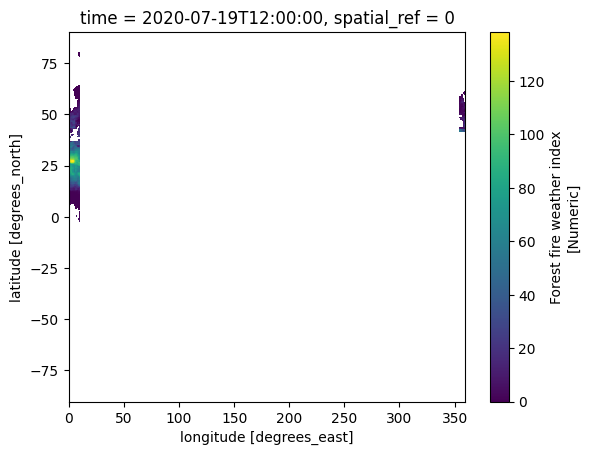

In [16]:
(fwi_scores.where(((fwi_scores.longitude > 353.5) | (fwi_scores.longitude < 10)) & ((fwi_scores.latitude > 41) | (fwi_scores.longitude < 52))).fwi[200]).plot()